<a href="https://colab.research.google.com/github/Svapnarajsinh-Bhadola/Blog_Django/blob/main/Task3SubTask12_head_tail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from keras.datasets import mnist
import pandas as pd
import numpy as np
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense 
from keras.models import Sequential 
from numpy.random import seed

In [2]:
#Fortunately Keras already have this dataset on its server. Let's load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.20, random_state=3037)
# DONOT change the random_state variable

In [7]:
x_train.shape

(48000, 28, 28)

In [8]:
x_valid.shape

(12000, 28, 28)

In [9]:
d = pd.DataFrame()
d["y"] = y_train

In [10]:
# Let's analyze, how the distribution for the class variable looks like:
d.y.value_counts()

1    5381
7    5004
3    4876
2    4797
0    4785
9    4774
6    4743
4    4671
8    4610
5    4359
Name: y, dtype: int64

In [11]:
# Flattening the images
flattened_image = x_train.shape[1]*x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], flattened_image)
x_valid = x_valid.reshape(x_valid.shape[0], flattened_image)
x_test = x_test.reshape(x_test.shape[0], flattened_image)

In [12]:
x_train.shape

(48000, 784)

In [13]:
x_valid.shape

(12000, 784)

In [14]:
x_test.shape

(10000, 784)

In [15]:
# converting the classes to categorical variable
classes = np.unique(y_train)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
num_classes = len(classes)
num_classes

10

In [17]:
y_train = to_categorical(y_train)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [19]:
# Helper function 1: 
#create the neural network
def create_model(num_layers, num_units, flattened_size, activation_function, class_size):
  '''
  We create a neural network in this function. You can choose the layer size, the units perlayer, activation function,
  and size of the class. This function creates the basic architecture required to handle the tasks.
  '''

  model = Sequential()
  model.add(Dense(units=num_units, activation=activation_function, input_shape=(flattened_size,)))
  for i in range(num_layers-1):
    model.add(Dense(units=num_units, activation=activation_function))
  model.add(Dense(units=num_classes, activation='softmax'))

  return model

In [20]:
def evaluate(FCmodel, Learning_Rate, batch_sz, epochs, add_visualization=True):
  '''
  This function will run and evaluate the neural network. 
  *** Important: DoNOT change the seed values. This will ensure the reproducibility of the experiments.
  '''
  seed(37)
  random.seed(37)
  tf.random.set_seed(37)
  opt = tf.keras.optimizers.SGD(learning_rate=Learning_Rate)
  FCmodel.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  history = FCmodel.fit(x_train, y_train, batch_size=batch_sz, epochs=epochs, 
                        verbose=add_visualization, validation_data=(x_valid, y_valid))
  loss, accuracy  = FCmodel.evaluate(x_valid, y_valid, verbose=False)

  if add_visualization:
    print(f'validation loss: {loss:.4}')
    print(f'validation accuracy: {accuracy:.4}')

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model performance')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()


  return loss, accuracy

Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3052 - accuracy: 0.1114 - val_loss: 2.2973 - val_accuracy: 0.1134
Epoch 2/100
188/188 [==============================] - 0s 3ms/step - loss: 2.2952 - accuracy: 0.1210 - val_loss: 2.2925 - val_accuracy: 0.1152
Epoch 3/100
188/188 [==============================] - 0s 3ms/step - loss: 2.2887 - accuracy: 0.1403 - val_loss: 2.2838 - val_accuracy: 0.1951
Epoch 4/100
188/188 [==============================] - 0s 3ms/step - loss: 2.2742 - accuracy: 0.1916 - val_loss: 2.2611 - val_accuracy: 0.1896
Epoch 5/100
188/188 [==============================] - 0s 3ms/step - loss: 2.2294 - accuracy: 0.2124 - val_loss: 2.1806 - val_accuracy: 0.2066
Epoch 6/100
188/188 [==============================] - 0s 3ms/step - loss: 2.0842 - accuracy: 0.2160 - val_loss: 1.9792 - val_accuracy: 0.2177
Epoch 7/100
188/188 [==============================] - 0s 3ms/step - loss: 1.9010 - accuracy: 0.2324 - val_loss: 1.8413 - val_accuracy: 0.2566

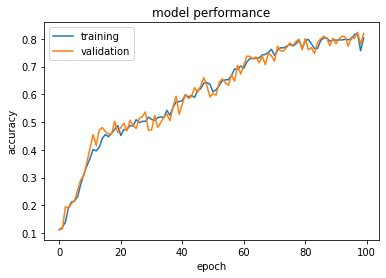

In [21]:
special_model = create_model(num_layers=4, num_units=16, flattened_size=x_test.shape[1], 
                     activation_function='sigmoid', class_size=num_classes)
loss, acc = evaluate(FCmodel=special_model, Learning_Rate=0.1, batch_sz=256, epochs=100)

In [22]:
special_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 13,546
Trainable params: 13,546
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Below are the five classes of hyperparameters
LAYERS = [2, 3, 4]
UNITS = [4, 8, 16, 32, 64, 128, 256]
BATCH = [8, 16, 32, 64, 128]
LEARNING_RATE = [0.1, 0.01, 0.001, 0.0001, 0.00001]
EPOCHS = [10, 20, 30, 40, 100]

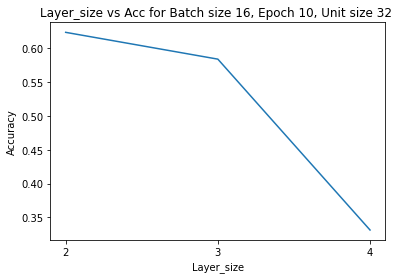

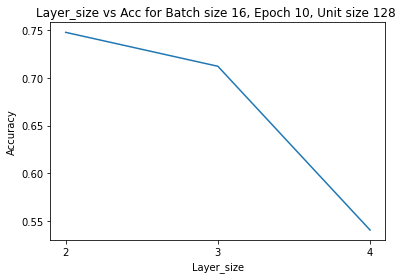

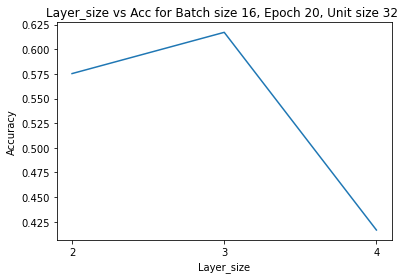

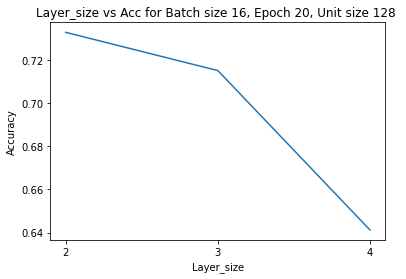

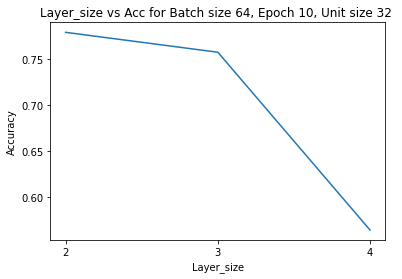

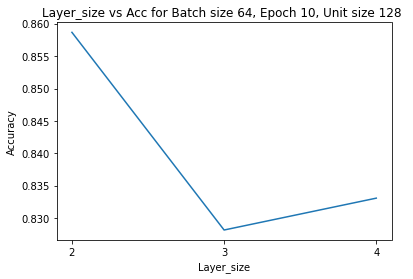

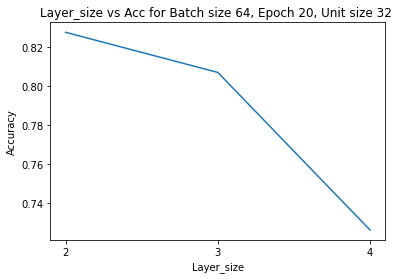

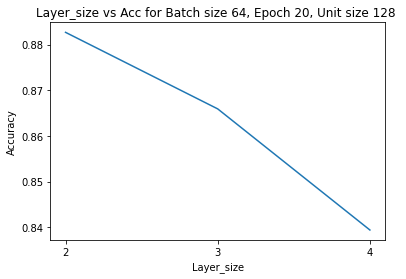

CPU times: user 24min 49s, sys: 1min 53s, total: 26min 42s
Wall time: 24min 9s


In [ ]:
# Question 1: create a Layer-vs-accuracy graph for the following setting:
# units = [32, 128], Batch_size = [16, 64], Learning_rate = [0.1], Epochs = [10, 20]
# That means there will be 2*2*1*2 = 8 graphs
%%time
for B in [16, 64]:
  for E in [10,20]:
    for U in [32, 128]:
      ACC = []
      for L in LAYERS:
        special_model = create_model(num_layers=L, num_units=U, flattened_size=x_test.shape[1], 
                            activation_function='sigmoid', class_size=num_classes)
        loss, acc = evaluate(FCmodel=special_model, Learning_Rate=0.1, batch_sz=B, epochs=E, add_visualization=False)
        ACC.append(acc) 

      plt.plot(LAYERS, ACC)
      plt.xticks(LAYERS)
      plt.xlabel("Layer_size")
      plt.ylabel("Accuracy")
      TITLE = "Layer_size vs Acc for Batch size {}, Epoch {}, Unit size {} ".format(B, E, U)
      plt.title(TITLE)
      plt.show()

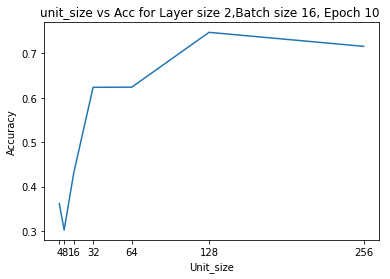

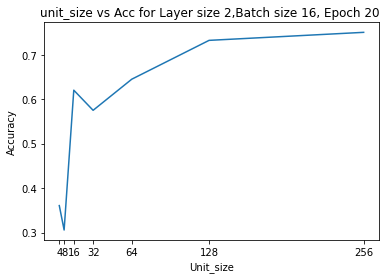

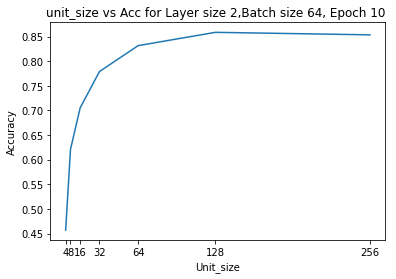

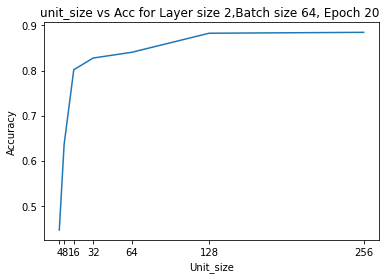

CPU times: user 28min 23s, sys: 2min 27s, total: 30min 51s
Wall time: 25min 14s


In [ ]:
# Question 2: create a Unit size-vs-accuracy graph for the following setting:
# Layer size = [2], Batch_size = [16, 64], Learning_rate = [0.1], Epochs = [10, 20]
# That means there will be 1*2*1*2 = 4 graphs

## code starts here
%%time
for B in [16, 64]:
  for E in [10,20]:
    for L in [2]:
      ACC = []
      for U in UNITS:
        special_model = create_model(num_layers= L, num_units=U, flattened_size=x_test.shape[1], 
                            activation_function='sigmoid', class_size=num_classes)
        loss, acc = evaluate(FCmodel=special_model, Learning_Rate=0.1, batch_sz=B, epochs=E, add_visualization=False)
        ACC.append(acc) 

      plt.plot(UNITS, ACC)
      plt.xticks(UNITS)
      plt.xlabel("Unit_size")
      plt.ylabel("Accuracy")
      TITLE = "unit_size vs Acc for Layer size {},Batch size {}, Epoch {} ".format(L, B, E)
      plt.title(TITLE)
      plt.show()

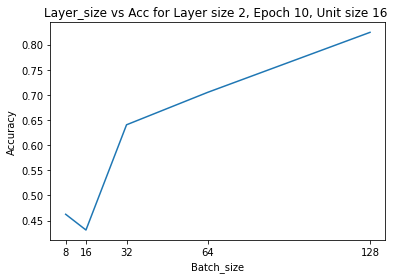

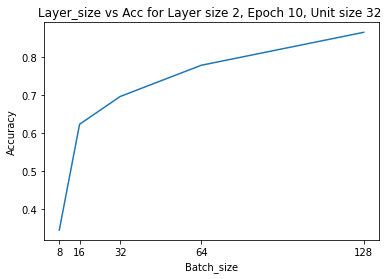

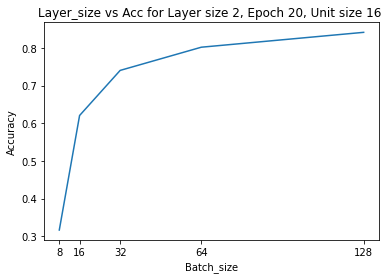

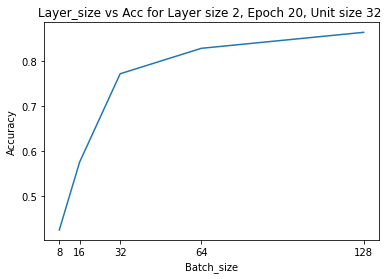

CPU times: user 18min 43s, sys: 1min 33s, total: 20min 16s
Wall time: 16min 30s


In [ ]:
# Question 3: create a Batch size-vs-accuracy graph for the following setting:
# Layer size = [2], Unit_size = [16, 32], Learning_rate = [0.1], Epochs = [10, 20]
# That means there will be 1*2*1*2 = 4 graphs

## code starts here
%%time
for L in [2]:
  for E in [10,20]:
    for U in [16, 32]:
      ACC = []
      for B in BATCH:
        special_model = create_model(num_layers= L, num_units=U, flattened_size=x_test.shape[1], 
                            activation_function='sigmoid', class_size=num_classes)
        loss, acc = evaluate(FCmodel=special_model, Learning_Rate=0.1, batch_sz=B, epochs=E, add_visualization=False)
        ACC.append(acc) 

      plt.plot(BATCH, ACC)
      plt.xticks(BATCH)
      plt.xlabel("Batch_size")
      plt.ylabel("Accuracy")
      TITLE = "Layer_size vs Acc for Layer size {}, Epoch {}, Unit size {} ".format(L, E, U)
      plt.title(TITLE)
      plt.show()

In [ ]:
# Below are the five classes of hyperparameters
LAYERS = [2, 3, 4]
UNITS = [4, 8, 16, 32, 64, 128, 256]
BATCH = [8, 16, 32, 64, 128]
LEARNING_RATE = [0.1, 0.01, 0.001, 0.0001, 0.00001]
EPOCHS = [10, 20, 30, 40, 100]

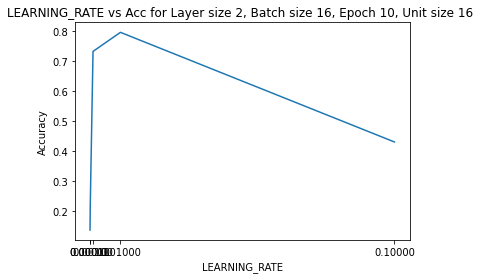

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f0875ee4b90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 
Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f0875ee4b90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


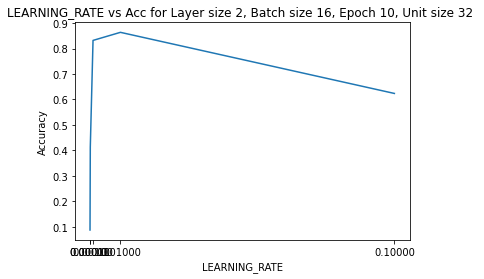

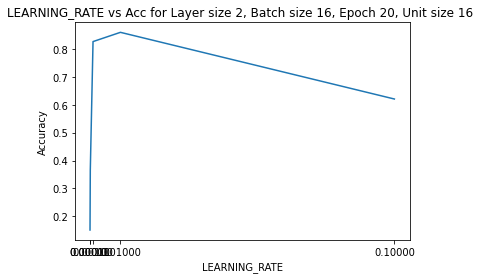

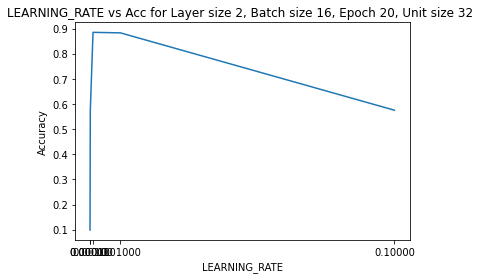

CPU times: user 24min 9s, sys: 1min 53s, total: 26min 2s
Wall time: 21min 4s


In [ ]:
## Question 4: create a Learning rate-vs-accuracy graph for the following setting:
## Layer size = [2], Unit_size = [16, 32], Batch_size = [16], Epochs = [10, 20]
## That means there will be 1*2*1*2 = 4 graphs

## code starts here
%%time
for B in [16]:
  for E in [10,20]:
    for U in [16, 32]:
      for L in [2]:
        ACC = []
        for LR in [0.1, 0.01, 0.001, 0.0001, 0.00001]:
      
      
          special_model = create_model(num_layers=L, num_units=U, flattened_size=x_test.shape[1], 
                                       activation_function='sigmoid', class_size=num_classes)
          loss, acc = evaluate(FCmodel=special_model, Learning_Rate=LR, batch_sz=B, epochs=E, add_visualization=False)
          ACC.append(acc) 

      plt.plot(LEARNING_RATE, ACC)
      plt.xticks(LEARNING_RATE)
      plt.xlabel("LEARNING_RATE")
      plt.ylabel("Accuracy")
      TITLE = "LEARNING_RATE vs Acc for Layer size {}, Batch size {}, Epoch {}, Unit size {} ".format(L, B, E, U)
      plt.title(TITLE)
      plt.show()


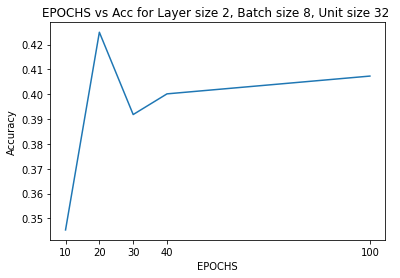

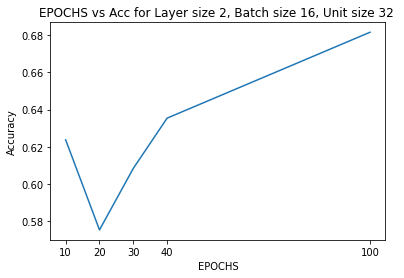

CPU times: user 47min, sys: 3min 36s, total: 50min 37s
Wall time: 38min 41s


In [ ]:
# Question 5: create a Epoch size-vs-accuracy graph for the following setting:
# Layer size = [2], Unit_size = [32], Batch_size = [8, 16], Learning_rate = [0.1]
# That means there will be 1*1*2*1 = 2 graphs

## code starts here
%%time
for B in [8,16]:
  for U in [32]:
    for L in [2]:
      ACC = []
      for EP in EPOCHS:
      
      
        special_model = create_model(num_layers=L, num_units=U, flattened_size=x_test.shape[1], 
                                     activation_function='sigmoid', class_size=num_classes)
        loss, acc = evaluate(FCmodel=special_model, Learning_Rate=0.1, batch_sz=B, epochs=EP, add_visualization=False)
        ACC.append(acc) 

      plt.plot(EPOCHS, ACC)
      plt.xticks(EPOCHS)
      plt.xlabel("EPOCHS")
      plt.ylabel("Accuracy")
      TITLE = "EPOCHS vs Acc for Layer size {}, Batch size {}, Unit size {} ".format(L, B, U)
      plt.title(TITLE)
      plt.show()

In [ ]:
LAYERS = [2, 3, 4]
UNITS = [16, 64]
BATCH_SIZE = [8, 32, 128]
LEARNING_RATE = [0.1, 0.01, 0.001, 0.0001, 0.00001]
EPOCHS = [10, 20, 30]

In [ ]:
%%time
dfall = pd.DataFrame(columns = ["LAYERS", "UNITS", "BATCH_SIZE", "LEARNING_RATE", "EPOCHS", "ACCURACY"])
for B in [8,32,128]:
  for E in [10,20,30]:
    for U in [16,64]:
      for L in [2,3,4]:
        #ACC = []
        
        for LR in [0.1, 0.01, 0.001, 0.0001, 0.00001]:
          
          special_model = create_model(num_layers=L, num_units=U, flattened_size=x_test.shape[1], 
                                       activation_function='sigmoid', class_size=num_classes)
          loss, acc = evaluate(FCmodel=special_model, Learning_Rate=LR, batch_sz=B, epochs=E, add_visualization=False)
          #ACC.append(acc) 
          print(acc)
          dfall1 = pd.DataFrame({"LAYERS": [L],
                              "UNITS": [U],
                              "BATCH_SIZE": [B],
                              "LEARNING_RATE": [LR],
                              "EPOCHS": [E],
                              "ACCURACY": [acc],
                              })
          dfall = dfall.append(dfall1, ignore_index= True)
#        plt.plot(LAYERS, ACC)
#        plt.xticks(LAYERS)
#        plt.xlabel("Layer_size")
#        plt.ylabel("Accuracy")
#        TITLE = "Layer_size vs Acc for Batch size {}, Epoch {}, Unit size {} ".format(B, E, U)
#        plt.title(TITLE)
#        plt.show()


#def hyperparameter_ranking(LAYERS, UNITS, BATCH_SIZE, LEARNING_RATE, EPOCHS) ->pd.DataFrame:
  '''
  Your code should return a DataFrame where columns will be LAYERS, UNITS, BATCH_SIZE, LEARNING_RATE, EPOCHS and corresponding accuracy.
  The dataframe MUST be sorted in descending order based on the accuracy like the following cell. There will be 270 row
  
  '''

In [ ]:
dfall_sort = dfall.sort_values(by=['ACCURACY'], ascending= False, ignore_index = True)

In [ ]:
dfall_sort.to_csv("learning_rate_all_sorted.csv")

In [ ]:
dfall_sort.head(10)

,LAYERS,UNITS,BATCH_SIZE,LEARNING_RATE,EPOCHS,ACCURACY
0,2,64,8,0.001,30,0.932833
1,2,64,32,0.010,30,0.927750
2,2,64,32,0.010,20,0.923583
3,2,64,8,0.001,20,0.922917
4,2,64,128,0.010,30,0.921167
5,3,64,32,0.010,20,0.916833
6,3,64,8,0.001,30,0.916167
7,3,64,32,0.010,30,0.915167
8,2,64,32,0.010,10,0.913167
9,2,64,128,0.010,20,0.912750


In [ ]:
dfall_sort.tail(10)

,LAYERS,UNITS,BATCH_SIZE,LEARNING_RATE,EPOCHS,ACCURACY
260,4,64,8,0.00001,10,0.094833
261,3,64,32,0.00001,10,0.094833
262,3,64,128,0.00001,20,0.094833
263,4,64,128,0.00001,20,0.094833
264,3,64,32,0.00001,20,0.093917
265,3,64,128,0.00010,10,0.093167
266,3,64,32,0.00001,30,0.091000
267,3,64,8,0.00001,10,0.087083
268,3,64,128,0.00010,20,0.085333
269,4,64,128,0.00010,20,0.060667


In [23]:
df = pd.read_csv('/content/learning_rate_all_sorted.csv')

In [24]:
df

,Unnamed: 0,LAYERS,UNITS,BATCH_SIZE,LEARNING_RATE,EPOCHS,ACCURACY
0,0,2,64,8,0.00100,30,0.932833
1,1,2,64,32,0.01000,30,0.927750
2,2,2,64,32,0.01000,20,0.923583
3,3,2,64,8,0.00100,20,0.922917
4,4,2,64,128,0.01000,30,0.921167
...,...,...,...,...,...,...,...
265,265,3,64,128,0.00010,10,0.093167
266,266,3,64,32,0.00001,30,0.091000
267,267,3,64,8,0.00001,10,0.087083
268,268,3,64,128,0.00010,20,0.085333


In [43]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

Optimizer = ['SGD', 'ADAM', 'RMSprop', 'Adagrad'] ##(https://keras.io/api/optimizers/)
Dropout_rate = [0, 0.2, 0.5] ##(https://keras.io/api/layers/regularization_layers/dropout/)
Kernel_Initializer = ['RandomUniform', 'GlorotNormal', 'RandomNormal', 'zero']

In [44]:
# Helper function 1: 
#create the neural network
def create_model_subtask3(num_layers, num_units, flattened_size, activation_function, class_size, Kernel_Initializer, drp):
  '''
  We create a neural network in this function. You can choose the layer size, the units perlayer, activation function,
  and size of the class. This function creates the basic architecture required to handle the tasks.
  '''

  model = Sequential()
  model.add(Dense(units=num_units, kernel_initializer = Kernel_Initializer,activation=activation_function, input_shape=(flattened_size,)))
  model.add(tf.keras.layers.Dropout(drp))
  for i in range(num_layers-1):
    model.add(Dense(units=num_units, activation=activation_function))
  model.add(Dense(units=num_classes, activation='softmax'))

  return model

In [45]:
def evaluate_subtask3(FCmodel, Learning_Rate, batch_sz, epochs,
             ptimizer, add_visualization=True):
  '''
  This function will run and evaluate the neural network. 
  *** Important: DoNOT change the seed values. This will ensure the reproducibility of the experiments.
  '''
  seed(37)
  random.seed(37)
  tf.random.set_seed(37)
  #opt = tf.keras.optimizers.ptimizer(learning_rate=Learning_Rate)
  FCmodel.compile(optimizer= ptimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  history = FCmodel.fit(x_train, y_train, batch_size=batch_sz, epochs=epochs, 
                        verbose=add_visualization, validation_data=(x_valid, y_valid))
  loss, accuracy  = FCmodel.evaluate(x_valid, y_valid, verbose=False)

  if add_visualization:
    print(f'validation loss: {loss:.4}')
    print(f'validation accuracy: {accuracy:.4}')

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model performance')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()


  return loss, accuracy

In [46]:
U = 64
L = 2
LR = 0.00100
B= 8
E= 30

In [ ]:
%%time
##def advanced_hyperparameter_search(OPTIMIZER, DROPOUT_RATE, KERNEL_INITIALIZER)->pd.DataFrame:
'''
  In the same way as subtask2, create a table with columns for 
  OPTIMIZER, DROPOUT_RATE, KERNEL_INITIALIZER and accuracy. 
  The dataframe MUST be sorted in descending order based on the accuracy like the following cell. There will be 48 rows, 
  For other parameters, use the best one you found from subtask2 function hyperparameter_ranking.  
'''
dfnew = pd.DataFrame(columns = ["OPTIMIZER", "DROPOUT_RATE", "KERNEL_INITIALIZER", "ACCURACY"])
for O in Optimizer:
  for DR in Dropout_rate:
    for KI in Kernel_Initializer:
             
      special_model = create_model_subtask3(num_layers=L, num_units=U, flattened_size=x_test.shape[1], 
                                            activation_function='sigmoid', class_size=num_classes,
                                            Kernel_Initializer = KI, drp = DR )
      loss, acc = evaluate_subtask3(FCmodel=special_model, Learning_Rate=LR, batch_sz=B, epochs=E, ptimizer= O, add_visualization=False)
      #ACC.append(acc) 
      print(acc)
      dfnew1 = pd.DataFrame({"OPTIMIZER": [O],
                             "DROPOUT_RATE": [DR],
                             "KERNEL_INITIALIZER": [KI],
                             "ACCURACY": [acc],
                              })
      dfnew = dfnew.append(dfnew1, ignore_index= True)
      
      
dfnew
'''for O in Optimizer:
    for K in Kernel_Initializer:
      for D in Dropout_Rate:
        ACC = []
        for L in LAYERS:
        special_model = create_model(num_layers=L, num_units=U, flattened_size=x_test.shape[1], 
                            activation_function='sigmoid', class_size=num_classes)
        loss, acc = evaluate(FCmodel=special_model, Learning_Rate=0.1, batch_sz=B, epochs=E, add_visualization=False)
        ACC.append(acc) 
'''
##      plt.plot(LAYERS, ACC)
##      plt.xticks(LAYERS)
##      plt.xlabel("Layer_size")
##      plt.ylabel("Accuracy")
##      TITLE = "Layer_size vs Acc for Batch size {}, Epoch {}, Unit size {} ".format(B, E, U)
##      plt.title(TITLE)
##      plt.show()

In [42]:
dfnew


,OPTIMIZER,DROPOUT_RATE,KERNEL_INITIALIZER,ACCURACY
0,SGD,0,RandomUniform,0.866917
1,SGD,0,GlorotNormal,0.873333
2,SGD,0,RandomNormal,0.890583
3,SGD,0,zero,0.869417
4,SGD,0,RandomUniform,0.866917
5,SGD,0,GlorotNormal,0.873333
6,SGD,0,RandomNormal,0.890583
7,SGD,0,zero,0.869417
8,SGD,0.2,RandomUniform,0.904750
9,SGD,0.2,GlorotNormal,0.909417


In [50]:
dfnew
dfnew.to_csv('task364.csv')